## MODEL CREATION ,FINDING TOP 3 IMPORTANCE FEATURES 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import f1_score,precision_score,recall_score
#tuning catboost paaramters using gridsearch CV
from sklearn.model_selection import GridSearchCV

In [3]:
#loading csv file using pandas
df=pd.read_csv(r"C:\Users\sachi\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv")

# TASK 3

## Model Building

- split data into train & test part
- we will take 23% of the data for testing

In [39]:
X = df.loc[:, df.columns != 'PerformanceRating']
y = df.PerformanceRating

**Data Normilization**(Minmax slacer)

* Min Max scaler is sclaing technique that scales all the data features in the range [0, 1]

In [40]:
#some columns have years,kilometers,hourly rate,values of these columns are different numeric figures
#lets normalize the data by using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(X)

In [41]:
y.value_counts()

1    874
0    194
2    132
Name: PerformanceRating, dtype: int64

**Data Balancing**(SMOTE)

* **SMOTE**-It is an oversampling technique aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [42]:
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data


In [43]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.23,random_state=42,stratify=y)

In [44]:
y_train.value_counts()

1    673
0    149
2    102
Name: PerformanceRating, dtype: int64

In [45]:
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
X_sm,y_sm=sm.fit_resample(x_train,y_train)#applying sampling on target variable 
print(Counter(y_sm))# checking count after sampling for  each class

Counter({1: 874, 0: 194, 2: 132})
Counter({1: 673, 2: 673, 0: 673})


In [46]:
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='weighted')

In [47]:
model_name = []
train_score = []
test_score = []
f1_scr=[]

def model_run(model):
  model.fit(X_sm,y_sm)  # fit data into model
  y_pred = model.predict(x_test) # prediction on test data
  tr_score = model.score(X_sm,y_sm)  # Train score
  te_score =  accuracy_score(y_test,y_pred) # Test score
  f1=f1_score(y_test,y_pred,average='weighted')  


  # for building data frame we store model data
  model_name.append(model)
  train_score.append(tr_score)
  test_score.append(te_score)
  f1_scr.append(f1)


  # print details
  print(model)
  print("Train Score",tr_score)
  print("Accuracy Score",te_score)
  print("F1 SCORE",f1)
  print("=====================================")
  print(classification_report(y_test,y_pred))
  print("=====================================")      
  print(confusion_matrix(y_test,y_pred))


In [48]:
rd  = RandomForestClassifier()
rid = RidgeClassifier()
lr =LogisticRegression(multi_class="ovr")
dec = DecisionTreeClassifier()
kn  = KNeighborsClassifier()
ct=CatBoostClassifier()
gd=GradientBoostingClassifier()
xgb = XGBClassifier(objective="multi:softmax")


# model List
models = [rd,rid,dec,kn,lr,ct,gd,xgb]

In [49]:
# try with every model 
for i in models:
  model_run(i)

RandomForestClassifier()
Train Score 1.0
Accuracy Score 0.9420289855072463
F1 SCORE 0.9412378284182121
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        45
           1       0.95      0.98      0.96       201
           2       0.93      0.87      0.90        30

    accuracy                           0.94       276
   macro avg       0.93      0.90      0.91       276
weighted avg       0.94      0.94      0.94       276

[[ 38   7   0]
 [  3 196   2]
 [  0   4  26]]
RidgeClassifier()
Train Score 0.8276374442793462
Accuracy Score 0.7246376811594203
F1 SCORE 0.7440271231914394
              precision    recall  f1-score   support

           0       0.48      0.64      0.55        45
           1       0.92      0.73      0.81       201
           2       0.44      0.83      0.57        30

    accuracy                           0.72       276
   macro avg       0.61      0.73      0.65       276
weighted avg       0.80      0.72

137:	learn: 0.1266318	total: 604ms	remaining: 3.77s
138:	learn: 0.1257345	total: 608ms	remaining: 3.77s
139:	learn: 0.1251623	total: 610ms	remaining: 3.75s
140:	learn: 0.1244447	total: 613ms	remaining: 3.73s
141:	learn: 0.1241817	total: 616ms	remaining: 3.72s
142:	learn: 0.1234950	total: 618ms	remaining: 3.71s
143:	learn: 0.1232552	total: 621ms	remaining: 3.69s
144:	learn: 0.1220612	total: 624ms	remaining: 3.68s
145:	learn: 0.1213423	total: 626ms	remaining: 3.66s
146:	learn: 0.1206250	total: 629ms	remaining: 3.65s
147:	learn: 0.1197773	total: 633ms	remaining: 3.64s
148:	learn: 0.1191691	total: 636ms	remaining: 3.63s
149:	learn: 0.1188768	total: 639ms	remaining: 3.62s
150:	learn: 0.1185049	total: 642ms	remaining: 3.61s
151:	learn: 0.1183108	total: 646ms	remaining: 3.61s
152:	learn: 0.1175420	total: 652ms	remaining: 3.61s
153:	learn: 0.1171333	total: 657ms	remaining: 3.61s
154:	learn: 0.1164513	total: 662ms	remaining: 3.61s
155:	learn: 0.1160729	total: 667ms	remaining: 3.61s
156:	learn: 

360:	learn: 0.0556816	total: 1.19s	remaining: 2.11s
361:	learn: 0.0553879	total: 1.19s	remaining: 2.1s
362:	learn: 0.0553402	total: 1.2s	remaining: 2.1s
363:	learn: 0.0552763	total: 1.2s	remaining: 2.09s
364:	learn: 0.0551036	total: 1.2s	remaining: 2.09s
365:	learn: 0.0549402	total: 1.2s	remaining: 2.09s
366:	learn: 0.0548547	total: 1.21s	remaining: 2.08s
367:	learn: 0.0545267	total: 1.21s	remaining: 2.08s
368:	learn: 0.0544581	total: 1.21s	remaining: 2.07s
369:	learn: 0.0542428	total: 1.22s	remaining: 2.07s
370:	learn: 0.0541771	total: 1.22s	remaining: 2.06s
371:	learn: 0.0539549	total: 1.22s	remaining: 2.06s
372:	learn: 0.0537443	total: 1.22s	remaining: 2.06s
373:	learn: 0.0535709	total: 1.23s	remaining: 2.05s
374:	learn: 0.0534308	total: 1.23s	remaining: 2.05s
375:	learn: 0.0532441	total: 1.23s	remaining: 2.04s
376:	learn: 0.0530226	total: 1.23s	remaining: 2.04s
377:	learn: 0.0529505	total: 1.24s	remaining: 2.04s
378:	learn: 0.0527854	total: 1.24s	remaining: 2.03s
379:	learn: 0.0525

605:	learn: 0.0299164	total: 1.77s	remaining: 1.15s
606:	learn: 0.0298818	total: 1.77s	remaining: 1.15s
607:	learn: 0.0298467	total: 1.78s	remaining: 1.15s
608:	learn: 0.0297495	total: 1.78s	remaining: 1.14s
609:	learn: 0.0297075	total: 1.78s	remaining: 1.14s
610:	learn: 0.0296300	total: 1.78s	remaining: 1.14s
611:	learn: 0.0295596	total: 1.79s	remaining: 1.13s
612:	learn: 0.0295490	total: 1.79s	remaining: 1.13s
613:	learn: 0.0295020	total: 1.79s	remaining: 1.13s
614:	learn: 0.0293905	total: 1.79s	remaining: 1.12s
615:	learn: 0.0293559	total: 1.79s	remaining: 1.12s
616:	learn: 0.0293308	total: 1.8s	remaining: 1.12s
617:	learn: 0.0292371	total: 1.8s	remaining: 1.11s
618:	learn: 0.0292051	total: 1.8s	remaining: 1.11s
619:	learn: 0.0291657	total: 1.8s	remaining: 1.11s
620:	learn: 0.0291235	total: 1.81s	remaining: 1.1s
621:	learn: 0.0290574	total: 1.81s	remaining: 1.1s
622:	learn: 0.0290242	total: 1.81s	remaining: 1.1s
623:	learn: 0.0289853	total: 1.81s	remaining: 1.09s
624:	learn: 0.02888

783:	learn: 0.0210748	total: 2.16s	remaining: 594ms
784:	learn: 0.0210293	total: 2.16s	remaining: 592ms
785:	learn: 0.0210049	total: 2.16s	remaining: 589ms
786:	learn: 0.0209669	total: 2.16s	remaining: 586ms
787:	learn: 0.0209415	total: 2.17s	remaining: 583ms
788:	learn: 0.0208718	total: 2.17s	remaining: 580ms
789:	learn: 0.0208272	total: 2.17s	remaining: 577ms
790:	learn: 0.0208062	total: 2.17s	remaining: 574ms
791:	learn: 0.0207632	total: 2.18s	remaining: 572ms
792:	learn: 0.0206977	total: 2.18s	remaining: 569ms
793:	learn: 0.0206854	total: 2.18s	remaining: 566ms
794:	learn: 0.0206239	total: 2.18s	remaining: 563ms
795:	learn: 0.0206043	total: 2.19s	remaining: 560ms
796:	learn: 0.0205907	total: 2.19s	remaining: 557ms
797:	learn: 0.0204939	total: 2.19s	remaining: 554ms
798:	learn: 0.0204394	total: 2.19s	remaining: 551ms
799:	learn: 0.0204070	total: 2.19s	remaining: 548ms
800:	learn: 0.0203374	total: 2.19s	remaining: 546ms
801:	learn: 0.0202997	total: 2.2s	remaining: 543ms
802:	learn: 0

963:	learn: 0.0156191	total: 2.54s	remaining: 95ms
964:	learn: 0.0156041	total: 2.55s	remaining: 92.4ms
965:	learn: 0.0155951	total: 2.55s	remaining: 89.7ms
966:	learn: 0.0155750	total: 2.55s	remaining: 87.1ms
967:	learn: 0.0155538	total: 2.55s	remaining: 84.4ms
968:	learn: 0.0155313	total: 2.56s	remaining: 81.8ms
969:	learn: 0.0155163	total: 2.56s	remaining: 79.1ms
970:	learn: 0.0154871	total: 2.56s	remaining: 76.5ms
971:	learn: 0.0154683	total: 2.56s	remaining: 73.8ms
972:	learn: 0.0154459	total: 2.57s	remaining: 71.2ms
973:	learn: 0.0154229	total: 2.57s	remaining: 68.6ms
974:	learn: 0.0154084	total: 2.57s	remaining: 65.9ms
975:	learn: 0.0153581	total: 2.57s	remaining: 63.3ms
976:	learn: 0.0153431	total: 2.58s	remaining: 60.6ms
977:	learn: 0.0153205	total: 2.58s	remaining: 58ms
978:	learn: 0.0153087	total: 2.58s	remaining: 55.4ms
979:	learn: 0.0152945	total: 2.58s	remaining: 52.7ms
980:	learn: 0.0152526	total: 2.58s	remaining: 50.1ms
981:	learn: 0.0152391	total: 2.59s	remaining: 47.4

In [50]:
model_report1 = pd.DataFrame([model_name,f1_scr,train_score,test_score]).T
model_report1.columns = ["Model","WEIGHTED F1 SCORE","Train Score","Test Score"]
model_report1.sort_values("WEIGHTED F1 SCORE",ascending=False).reset_index(drop=True)

,Model,WEIGHTED F1 SCORE,Train Score,Test Score
0,"(DecisionTreeClassifier(max_features='auto', r...",0.941238,1.0,0.942029
1,<catboost.core.CatBoostClassifier object at 0x...,0.924077,1.0,0.923913
2,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.923793,1.0,0.923913
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.92029,0.984151,0.92029
4,DecisionTreeClassifier(),0.852764,1.0,0.847826
5,LogisticRegression(multi_class='ovr'),0.755929,0.810797,0.73913
6,RidgeClassifier(),0.744027,0.827637,0.724638
7,KNeighborsClassifier(),0.578517,0.866766,0.543478


* Random forest forest performed well and Weighted f1 score is 94%
* **Most of the Models overfits with this data** but achieved a Weighted F1 score of more than 90% and accuray of more than than 90%

**EVALUATION METRICS**

 **Weighted F1 SCORE** - we are taking f1 score as the performance metrics,f1 score is the harmonic mean of precision and recall
* why f1 score?? Data is highly imbalanced (72% :17% :11%) and applying an algoithm with this data leads to overfit and missclassfication will occur..Too avoid this problem we applied some SMOTE techniques and selects evaluation metric as Weighted F1 score for checking the performance of our model...

### HYPERPARAMETER TUNING(top 4 models)
#### Random Forest

* Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems...Bagging is the ensemble technique used in Random Forest ..

In [200]:
# RepeatedStratifiedKFold is a cross-validation procedure multiple times (according to the n_repeats value)
#  and reporting the mean result across all folds from all runs.
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True,random_state=0)

In [201]:
#searching for the best paramters using grid search cv
from sklearn.model_selection import GridSearchCV
df=RandomForestClassifier()
grid = {'max_depth': [2,5,6,7],'n_estimators':[50,100,150,250,500],
        'min_samples_split': [2,4,6,8],'criterion':['gini','cross_entropy'],
       'min_samples_leaf':[2,4,6,8]
                         }
fit_params={"early_stopping_rounds":42, 
            "eval_metric" : "mae", 
            "eval_set" : [[x_test, y_test]]}
gscbc = GridSearchCV (estimator = df, param_grid = grid, scoring =f1, cv = cv,verbose=5,n_jobs=-1)
gscbc.fit(X_sm,y_sm) 

Fitting 10 folds for each of 640 candidates, totalling 6400 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'cross_entropy'],
                         'max_depth': [2, 5, 6, 7],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 150, 250, 500]},
             scoring=make_scorer(f1_score, average=weighted), verbose=5)

In [202]:
gscbc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 50}

In [211]:
CSD=RandomForestClassifier(criterion='gini',max_depth= 6,max_features='sqrt',min_samples_leaf= 2,min_samples_split= 2,
 n_estimators=100)

In [212]:
model2=CSD.fit(X_sm,y_sm) 
y_pred2=model2.predict(x_test)
f1_score(y_pred2,y_test,average='weighted')

0.9267722724681432

In [214]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred2, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred2, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred2, average='weighted')))
print('Accuracy of train:{:.2f} '.format(model2.score(X_sm,y_sm)))
print('Accuracy of test: {:.2f}'.format(accuracy_score(y_test, y_pred2)))

Weighted Precision: 0.93
Weighted Recall: 0.93
Weighted F1-score: 0.93
Accuracy of train:0.95 
Accuracy of test: 0.93


**confusion matrix**

In [215]:
confusion_matrix(y_test,y_pred2)

array([[ 41,   4,   0],
       [  5, 189,   7],
       [  0,   4,  26]], dtype=int64)

* Weighted f1 score is improved to 93% hyper paramter tuning and overfiting also reduced

#### Catboost Classifier

* The CatBoost algorithm is a Supervised Machine Learning algorithm and it is a newest boosting algorithms that works well with categorical data problems

In [216]:
#tuning catboost paaramters using gridsearch CV
from sklearn.model_selection import GridSearchCV
cbc=CatBoostClassifier()
grid = {'max_depth': [3,5],'n_estimators':[50,100,150,250,500,1000],
        'learning_rate':[0.005,0.01,0.5, 0.1,0.2,0.3,1],
       'l2_leaf_reg':[3,5,7, 9]
                         }
gscbc = GridSearchCV (estimator = cbc, param_grid = grid, scoring =f1, cv = cv,verbose=5,n_jobs=-1)
gscbc.fit(X_sm,y_sm) 

Fitting 10 folds for each of 336 candidates, totalling 3360 fits
0:	learn: 0.8811361	total: 11.8ms	remaining: 11.8s
1:	learn: 0.7405910	total: 13.5ms	remaining: 6.72s
2:	learn: 0.6442116	total: 15ms	remaining: 4.97s
3:	learn: 0.5770445	total: 16.5ms	remaining: 4.12s
4:	learn: 0.5207797	total: 18ms	remaining: 3.57s
5:	learn: 0.4780647	total: 19.6ms	remaining: 3.24s
6:	learn: 0.4410279	total: 20.9ms	remaining: 2.97s
7:	learn: 0.4181422	total: 22.3ms	remaining: 2.76s
8:	learn: 0.3885976	total: 23.5ms	remaining: 2.58s
9:	learn: 0.3717046	total: 24.8ms	remaining: 2.46s
10:	learn: 0.3533103	total: 26.4ms	remaining: 2.37s
11:	learn: 0.3380799	total: 27.8ms	remaining: 2.29s
12:	learn: 0.3284276	total: 29.3ms	remaining: 2.22s
13:	learn: 0.3181784	total: 30.5ms	remaining: 2.15s
14:	learn: 0.3087868	total: 31.8ms	remaining: 2.09s
15:	learn: 0.2980059	total: 33.1ms	remaining: 2.03s
16:	learn: 0.2902913	total: 34.4ms	remaining: 1.99s
17:	learn: 0.2832916	total: 35.6ms	remaining: 1.94s
18:	learn: 0.

266:	learn: 0.0524164	total: 386ms	remaining: 1.06s
267:	learn: 0.0522614	total: 388ms	remaining: 1.06s
268:	learn: 0.0521815	total: 389ms	remaining: 1.06s
269:	learn: 0.0520891	total: 391ms	remaining: 1.06s
270:	learn: 0.0519061	total: 392ms	remaining: 1.05s
271:	learn: 0.0515906	total: 394ms	remaining: 1.05s
272:	learn: 0.0511797	total: 395ms	remaining: 1.05s
273:	learn: 0.0510081	total: 397ms	remaining: 1.05s
274:	learn: 0.0507437	total: 398ms	remaining: 1.05s
275:	learn: 0.0506951	total: 400ms	remaining: 1.05s
276:	learn: 0.0504029	total: 401ms	remaining: 1.05s
277:	learn: 0.0499960	total: 403ms	remaining: 1.04s
278:	learn: 0.0499502	total: 404ms	remaining: 1.04s
279:	learn: 0.0494997	total: 406ms	remaining: 1.04s
280:	learn: 0.0490651	total: 407ms	remaining: 1.04s
281:	learn: 0.0487232	total: 409ms	remaining: 1.04s
282:	learn: 0.0486695	total: 411ms	remaining: 1.04s
283:	learn: 0.0486018	total: 412ms	remaining: 1.04s
284:	learn: 0.0485169	total: 413ms	remaining: 1.04s
285:	learn: 

562:	learn: 0.0223359	total: 767ms	remaining: 595ms
563:	learn: 0.0223194	total: 768ms	remaining: 594ms
564:	learn: 0.0223030	total: 770ms	remaining: 593ms
565:	learn: 0.0222597	total: 771ms	remaining: 591ms
566:	learn: 0.0222303	total: 773ms	remaining: 590ms
567:	learn: 0.0221544	total: 774ms	remaining: 589ms
568:	learn: 0.0221466	total: 775ms	remaining: 587ms
569:	learn: 0.0219783	total: 777ms	remaining: 586ms
570:	learn: 0.0218790	total: 778ms	remaining: 585ms
571:	learn: 0.0218431	total: 779ms	remaining: 583ms
572:	learn: 0.0218171	total: 781ms	remaining: 582ms
573:	learn: 0.0217782	total: 783ms	remaining: 581ms
574:	learn: 0.0216844	total: 785ms	remaining: 580ms
575:	learn: 0.0216627	total: 786ms	remaining: 579ms
576:	learn: 0.0216417	total: 787ms	remaining: 577ms
577:	learn: 0.0216075	total: 789ms	remaining: 576ms
578:	learn: 0.0215781	total: 791ms	remaining: 575ms
579:	learn: 0.0214127	total: 792ms	remaining: 573ms
580:	learn: 0.0213663	total: 793ms	remaining: 572ms
581:	learn: 

870:	learn: 0.0127950	total: 1.15s	remaining: 171ms
871:	learn: 0.0127697	total: 1.15s	remaining: 170ms
872:	learn: 0.0127488	total: 1.16s	remaining: 168ms
873:	learn: 0.0127411	total: 1.16s	remaining: 167ms
874:	learn: 0.0127135	total: 1.16s	remaining: 166ms
875:	learn: 0.0126997	total: 1.16s	remaining: 164ms
876:	learn: 0.0126958	total: 1.16s	remaining: 163ms
877:	learn: 0.0126846	total: 1.16s	remaining: 162ms
878:	learn: 0.0126431	total: 1.16s	remaining: 160ms
879:	learn: 0.0126369	total: 1.16s	remaining: 159ms
880:	learn: 0.0126324	total: 1.17s	remaining: 157ms
881:	learn: 0.0126082	total: 1.17s	remaining: 156ms
882:	learn: 0.0126045	total: 1.17s	remaining: 155ms
883:	learn: 0.0125991	total: 1.17s	remaining: 153ms
884:	learn: 0.0125965	total: 1.17s	remaining: 152ms
885:	learn: 0.0125777	total: 1.17s	remaining: 151ms
886:	learn: 0.0125265	total: 1.17s	remaining: 150ms
887:	learn: 0.0125187	total: 1.18s	remaining: 148ms
888:	learn: 0.0124943	total: 1.18s	remaining: 147ms
889:	learn: 

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x0000029B5A0745B0>,
             n_jobs=-1,
             param_grid={'l2_leaf_reg': [3, 5, 7, 9],
                         'learning_rate': [0.005, 0.01, 0.5, 0.1, 0.2, 0.3, 1],
                         'max_depth': [3, 5],
                         'n_estimators': [50, 100, 150, 250, 500, 1000]},
             scoring=make_scorer(f1_score, average=weighted), verbose=5)

In [217]:
print(gscbc.best_params_)

{'l2_leaf_reg': 5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 1000}


In [218]:
cb12=CatBoostClassifier(l2_leaf_reg= 5, learning_rate= 0.2, loss_function='MultiClass', max_depth= 5, n_estimators= 1000)
Model3=cb12.fit(X_sm,y_sm)
y_pred1=Model3.predict(x_test)

0:	learn: 0.8811361	total: 1.78ms	remaining: 1.78s
1:	learn: 0.7405910	total: 3.17ms	remaining: 1.58s
2:	learn: 0.6442116	total: 4.51ms	remaining: 1.5s
3:	learn: 0.5770445	total: 5.73ms	remaining: 1.43s
4:	learn: 0.5207797	total: 6.97ms	remaining: 1.39s
5:	learn: 0.4780647	total: 8.31ms	remaining: 1.38s
6:	learn: 0.4410279	total: 9.48ms	remaining: 1.34s
7:	learn: 0.4181422	total: 11.1ms	remaining: 1.37s
8:	learn: 0.3885976	total: 12.5ms	remaining: 1.38s
9:	learn: 0.3717046	total: 13.7ms	remaining: 1.35s
10:	learn: 0.3533103	total: 14.8ms	remaining: 1.33s
11:	learn: 0.3380799	total: 16ms	remaining: 1.31s
12:	learn: 0.3284276	total: 17.2ms	remaining: 1.3s
13:	learn: 0.3181784	total: 18.3ms	remaining: 1.29s
14:	learn: 0.3087868	total: 19.5ms	remaining: 1.28s
15:	learn: 0.2980059	total: 20.7ms	remaining: 1.27s
16:	learn: 0.2902913	total: 21.8ms	remaining: 1.26s
17:	learn: 0.2832916	total: 22.9ms	remaining: 1.25s
18:	learn: 0.2813546	total: 24ms	remaining: 1.24s
19:	learn: 0.2748249	total: 

309:	learn: 0.0450724	total: 378ms	remaining: 842ms
310:	learn: 0.0448678	total: 380ms	remaining: 843ms
311:	learn: 0.0447037	total: 382ms	remaining: 841ms
312:	learn: 0.0446654	total: 383ms	remaining: 840ms
313:	learn: 0.0444812	total: 384ms	remaining: 839ms
314:	learn: 0.0441210	total: 385ms	remaining: 838ms
315:	learn: 0.0436939	total: 387ms	remaining: 837ms
316:	learn: 0.0435759	total: 388ms	remaining: 836ms
317:	learn: 0.0434621	total: 389ms	remaining: 834ms
318:	learn: 0.0430521	total: 390ms	remaining: 833ms
319:	learn: 0.0428224	total: 392ms	remaining: 832ms
320:	learn: 0.0426861	total: 393ms	remaining: 832ms
321:	learn: 0.0424256	total: 395ms	remaining: 831ms
322:	learn: 0.0423215	total: 396ms	remaining: 830ms
323:	learn: 0.0422606	total: 397ms	remaining: 829ms
324:	learn: 0.0421929	total: 398ms	remaining: 827ms
325:	learn: 0.0421115	total: 400ms	remaining: 826ms
326:	learn: 0.0420754	total: 401ms	remaining: 826ms
327:	learn: 0.0417780	total: 402ms	remaining: 825ms
328:	learn: 

634:	learn: 0.0188134	total: 758ms	remaining: 435ms
635:	learn: 0.0187932	total: 759ms	remaining: 435ms
636:	learn: 0.0187426	total: 761ms	remaining: 434ms
637:	learn: 0.0187378	total: 762ms	remaining: 432ms
638:	learn: 0.0187253	total: 763ms	remaining: 431ms
639:	learn: 0.0186895	total: 765ms	remaining: 430ms
640:	learn: 0.0186325	total: 766ms	remaining: 429ms
641:	learn: 0.0186143	total: 767ms	remaining: 428ms
642:	learn: 0.0185771	total: 768ms	remaining: 427ms
643:	learn: 0.0185438	total: 770ms	remaining: 425ms
644:	learn: 0.0185152	total: 771ms	remaining: 424ms
645:	learn: 0.0184903	total: 772ms	remaining: 423ms
646:	learn: 0.0184664	total: 774ms	remaining: 422ms
647:	learn: 0.0184209	total: 775ms	remaining: 421ms
648:	learn: 0.0184100	total: 776ms	remaining: 420ms
649:	learn: 0.0183970	total: 777ms	remaining: 419ms
650:	learn: 0.0183446	total: 779ms	remaining: 417ms
651:	learn: 0.0183286	total: 780ms	remaining: 416ms
652:	learn: 0.0182820	total: 781ms	remaining: 415ms
653:	learn: 

804:	learn: 0.0141469	total: 949ms	remaining: 230ms
805:	learn: 0.0141423	total: 951ms	remaining: 229ms
806:	learn: 0.0141129	total: 953ms	remaining: 228ms
807:	learn: 0.0140857	total: 954ms	remaining: 227ms
808:	learn: 0.0140772	total: 956ms	remaining: 226ms
809:	learn: 0.0140411	total: 957ms	remaining: 224ms
810:	learn: 0.0140236	total: 958ms	remaining: 223ms
811:	learn: 0.0140172	total: 959ms	remaining: 222ms
812:	learn: 0.0139985	total: 960ms	remaining: 221ms
813:	learn: 0.0139800	total: 962ms	remaining: 220ms
814:	learn: 0.0139637	total: 963ms	remaining: 219ms
815:	learn: 0.0139511	total: 964ms	remaining: 217ms
816:	learn: 0.0139363	total: 965ms	remaining: 216ms
817:	learn: 0.0139341	total: 966ms	remaining: 215ms
818:	learn: 0.0139008	total: 968ms	remaining: 214ms
819:	learn: 0.0138829	total: 969ms	remaining: 213ms
820:	learn: 0.0138447	total: 970ms	remaining: 211ms
821:	learn: 0.0138323	total: 971ms	remaining: 210ms
822:	learn: 0.0138062	total: 972ms	remaining: 209ms
823:	learn: 

968:	learn: 0.0112507	total: 1.14s	remaining: 36.5ms
969:	learn: 0.0112279	total: 1.14s	remaining: 35.3ms
970:	learn: 0.0112140	total: 1.14s	remaining: 34.1ms
971:	learn: 0.0111966	total: 1.14s	remaining: 32.9ms
972:	learn: 0.0111856	total: 1.14s	remaining: 31.8ms
973:	learn: 0.0111559	total: 1.15s	remaining: 30.6ms
974:	learn: 0.0111282	total: 1.15s	remaining: 29.4ms
975:	learn: 0.0110788	total: 1.15s	remaining: 28.2ms
976:	learn: 0.0110644	total: 1.15s	remaining: 27.1ms
977:	learn: 0.0110573	total: 1.15s	remaining: 25.9ms
978:	learn: 0.0110410	total: 1.15s	remaining: 24.7ms
979:	learn: 0.0110340	total: 1.15s	remaining: 23.5ms
980:	learn: 0.0110133	total: 1.15s	remaining: 22.4ms
981:	learn: 0.0110115	total: 1.16s	remaining: 21.2ms
982:	learn: 0.0110046	total: 1.16s	remaining: 20ms
983:	learn: 0.0109980	total: 1.16s	remaining: 18.8ms
984:	learn: 0.0109828	total: 1.16s	remaining: 17.6ms
985:	learn: 0.0109676	total: 1.16s	remaining: 16.5ms
986:	learn: 0.0109662	total: 1.16s	remaining: 15

In [219]:

f1_score(y_pred1,y_test,average='weighted')

0.9236714951431456

In [220]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix,precision_score

In [222]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred1, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred1, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred1, average='weighted')))
print('Accuracy of train: {:.2f}'.format(Model3.score(X_sm,y_sm)))
print('Accuracy of test: {:.2f}'.format(accuracy_score(y_test, y_pred1)))

Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-score: 0.92
Accuracy of train: 1.00
Accuracy of test: 0.92


**confusion matrix**

In [223]:
confusion_matrix(y_test,y_pred1)

array([[ 39,   6,   0],
       [  8, 190,   3],
       [  0,   4,  26]], dtype=int64)

* Score not improved and model overfits too

#### XGB classfier

* XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable

In [255]:
#Trying with xgb with paramater tuning
xgb = XGBClassifier()
grid = {'max_depth': [3,5,7],'n_estimators':[50,100,150,250,500,1000],
        'learning_rate':[0.001,0.01,0.05, 0.1,0.2],'min_child_weight':[2,4,6,8],'subsample':[0.2,0.5,0.8]
                         }
gscbc = GridSearchCV (estimator = xgb, param_grid = grid, scoring =f1, cv = 5,verbose=5,n_jobs=-1)
gscbc.fit(X_sm,y_sm) 

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                         

In [ ]:
print(gscbc.best_params_)

In [355]:
xGB1=XGBClassifier(subsample= .8, learning_rate= 0.02, objective='multi:softmax',
                   min_child_weight=16,max_depth= 3, n_estimators= 400)
Model4=xGB1.fit(X_sm,y_sm)
y_pred13=Model4.predict(x_test)

In [356]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred13, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred13, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred13, average='weighted')))
print('Accuracy of train: {:.2f}'.format(xGB1.score(X_sm,y_sm)))
print('Accuracy of test: {:.2f}'.format(accuracy_score(y_test, y_pred13)))

Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-score: 0.92
Accuracy of train: 0.94
Accuracy of test: 0.92


**confusion matrix**

In [357]:
confusion_matrix(y_test,y_pred13)

array([[ 39,   6,   0],
       [  7, 188,   6],
       [  0,   4,  26]], dtype=int64)

* Score of XGB not improved but there is no overfitting problem

#### Gradient Boosting Classifier

* Gradient Boosting is a supervised learning algorithm and popular boosting algorithm..Shrinkage is the technique used in the Gradient boosting Alogorithm..

In [105]:
#Trying with xgb with paramater tuning
gb2 = GradientBoostingClassifier()
grid = {'max_depth': [3,5,10,20,100],'n_estimators':[50,100,150,250,500,1000],
        'learning_rate':[0.005,0.01,0.5, 0.1,0.3,1],'subsample':[0.2,0.5,0.8],
        'min_samples_leaf':[2,4,6]
                         }
gscbc = GridSearchCV (estimator = gb2, param_grid = grid, scoring =f1, cv = 5,verbose=5,n_jobs=-1)
gscbc.fit(X_sm,y_sm) 

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.5, 0.1, 0.3, 1],
                         'max_depth': [3, 5, 10, 20, 100],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [50, 100, 150, 250, 500, 1000],
                         'subsample': [0.2, 0.5, 0.8]},
             scoring=make_scorer(f1_score, average=weighted), verbose=5)

In [ ]:
print(gscbc.best_params_)

In [400]:
GB1=GradientBoostingClassifier(subsample= .4, learning_rate= 0.1,
                   min_samples_leaf= 11,max_depth= 5, n_estimators= 30)
Model6=GB1.fit(X_sm,y_sm)
y_pred14=Model6.predict(x_test)

In [401]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred14, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred14, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred14, average='weighted')))
print('Accuracy of train: {:.2f}'.format(Model6.score(X_sm,y_sm)))
print('Accuracy of test: {:.2f}'.format(accuracy_score(y_test, y_pred14)))

Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-score: 0.92
Accuracy of train: 0.96
Accuracy of test: 0.92


**confusion matrix**

In [402]:
confusion_matrix(y_test,y_pred14)

array([[ 39,   6,   0],
       [  8, 188,   5],
       [  0,   4,  26]], dtype=int64)

* Overfits reduced and weighted f1 score is 92%

### MODEL REPORT

**Models and performance(before tuning)**

In [111]:
model_report1 = pd.DataFrame([model_name,f1_scr,train_score,test_score]).T
model_report1.columns = ["Model","WEIGHTED F1 SCORE","Train Score","Test Score"]
model_report1.sort_values("WEIGHTED F1 SCORE",ascending=False).reset_index(drop=True)

,Model,WEIGHTED F1 SCORE,Train Score,Test Score
0,"(DecisionTreeClassifier(max_features='auto', r...",0.934261,1.0,0.934783
1,([DecisionTreeRegressor(criterion='friedman_ms...,0.928197,0.986627,0.927536
2,<catboost.core.CatBoostClassifier object at 0x...,0.927027,1.0,0.927536
3,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.92423,1.0,0.923913
4,DecisionTreeClassifier(),0.849438,1.0,0.844203
5,LogisticRegression(multi_class='ovr'),0.738927,0.811788,0.721014
6,RidgeClassifier(),0.727087,0.822189,0.706522
7,KNeighborsClassifier(),0.519158,0.867756,0.478261


* We tried with 8 ML algorithms and as we can see that most of the algorithms performed very well and some of them were overfits...Random forest and Boosting algorithms are worked well with this data..

**Performance of Models(Top 4 models) after hyper paramter tuning**

In [403]:
models_list = ['Random Forest Classifier','CatBoost Classifier','XGB Classifier','GB classifier']
weighted_f1_Score=[93,92,92,92]
test_accuracy= [94,92,92,92]
train_accuracy = [95,100,94,92]
model_report3 = pd.DataFrame([models_list,weighted_f1_Score,test_accuracy,train_accuracy]).T
model_report3.columns = ["Modelname","weighted F1 score","Test Score","Train score"]
ER=model_report3.sort_values("weighted F1 score",ascending=False).reset_index(drop=True)
ER

,Modelname,weighted F1 score,Test Score,Train score
0,Random Forest Classifier,93,94,95
1,CatBoost Classifier,92,92,100
2,XGB Classifier,92,92,94
3,GB classifier,92,92,92


* In the above models **Random Forest** performed well and successfully predicts the test data with an **f1 score(Weighted) of 93% and accuracy of 93%**
* Due to the small and imbalanced dataset Random Forest model slightly overfits, bowever it is a generalised model 
* Hyper paramter tuning of **Random Forest with GridSearchCV really helps to identify the optimlal paramters**
* **k fold is used for the cross validation** and helps to stratified sampling and cross validation in paramter tuning
* **MinMaxScaler preserves the shape of the original distribution**,it doesn’t meaningfully change the information embedded in the original data.Most of the columns are poitively skewed even after outlier treatment,the data set is small and treating outliers to a certain extend may leads to change in the total behaviour and pattern

**Model**

In [ ]:
# saving model with the help of pickle
import pickle

file = open('Random_forest.pkl','wb')
pickle.dump(model2,file)

# TASK 2

**Feature Importance**

 1) EmpLastSalaryHikePercent           0.260125
 2) EmpEnvironmentSatisfaction         0.234165
 3) YearsSinceLastPromotion            0.111264
 4) ExperienceYearsInCurrentRole       0.043812
 5) EmpHourlyRate                      0.042768
 6) EmpDepartment                      0.039085
 7) EmpJobRole                         0.038225
 8) YearsWithCurrManager               0.027924
 9) OverTime                           0.027507
10) Age                                0.026928
11) ExperienceYearsAtThisCompany       0.026891
12) DistanceFromHome                   0.023956
13) TotalWorkExperienceInYears         0.021718
14) EmpWorkLifeBalance                 0.021055
15) TrainingTimesLastYear              0.015363
16) EmpJobSatisfaction                 0.015005
17) NumCompaniesWorked                 0.014778
18) EmpJobLevel                        0.009432


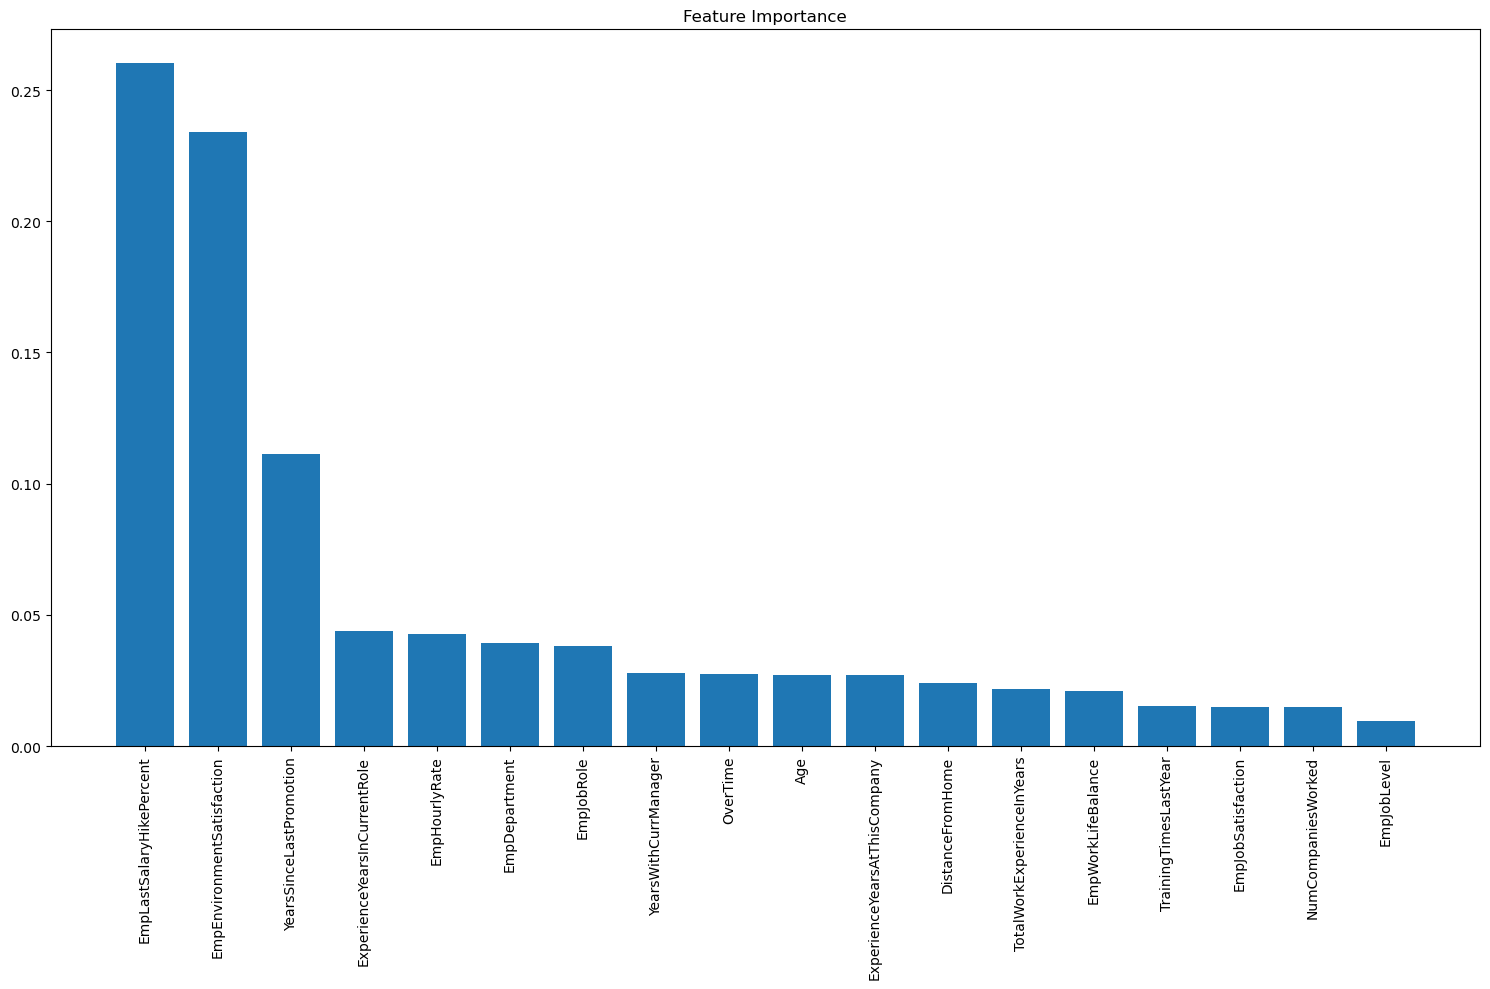

In [117]:
importances=model2.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_sm.columns[0:]
 
for f in range(X_sm.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 34,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))
#visualise features importance
plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.bar(range(X_sm.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_sm.shape[1]), X_sm.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show() 

### Top 3 Important Factors effecting employee performance


* **Environment Satisfaction**-It is an important factor that affecting the employee performance considerably in a comapny..20% employees are moderatly and 19% of employees not satisfied with the working environment which is a high number.... Due to this dis-satisfation it mostly affected sales,Human Resource and Finance department..

 There another crutial factor is **Age**
* **Age** is another critical feature that will affect the performance of employees..Data distribution is high in 30 to 40 age group,Grade 3 and Grade 4 employees are also high in this age group..The performance rate keeps on falling with increasing age..4 rated employees are comparitively less in the age group of more than 40
* **Salary Hike percentage**-Higher hikes motivate people to work better, and stay in the organization.f 50% Grade 3 employees recieved 10 to 15 and 20% recieved 16% to 20% hike in thier salary..7% employees with rating of 4 recieved a hike of 20% to 25%


# TASK 4

### Recommendations to improve the employee performance based on insights from analysis

* The important factor that affects the employee performance is environment satisfaction,company should ensure that employees are satisfied with environment if problems are there find reasons and rectify it..
* Performance evaluation system is weak in most of the departments..Proper and timely performance evaluation is require to measure the deviations in the performance against actual performance 
* Trainings are another important factor..35% of employees didnot attend anyt training last year,Proper and sufficient is necessary for the employees..And if sufficient training are conducted company should ensure that the benfits trainings are actually recieved or not
* Reasonable and well addressed salary hike should be provided,in sales and finance department some perncentage of weak employees got a hike of more than 15%..
* An yearly survey regarding work life balance is needed to understand work life balance of employees in this company
* Job dis-satisfaction rate is increasing in very department , 83% employees are performing with a grade of 3 and more..Company should seriously take of employee satisfaction matters timely and properly...
* Comapny needs to analyse exit surveys and exit interviews of employees who left the company 
* Quaraterly analysis of Job involvement is necessary especially in Sales and Finance department
*  63% of employees have a bachelors degree or masters,periodic skill improvement programs should be conducted in employees 